In [1]:
import numpy as np
import pandas as pd
%tensorflow_version 1.x
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from IPython import display
from sklearn import tree

TensorFlow 1.x selected.


In [2]:
heart_dataframe = pd.read_csv("8_heart-c.csv", sep=";")

heart_dataframe = heart_dataframe.reindex(
    np.random.permutation(heart_dataframe.index))

# Naive Bayes Classifier

In [ ]:
X = heart_dataframe[
    ["att1",
     "att2",
     "att3",
     "att4",
     "att5",
     "att6",
     "att7",
     "att8",
     "att9",
     "att10",
     "att11",
     "att12",
     "att13",
     "att14",
     "att15",
     "att16",
     "att17",
     "att18",
     "att19",
     "att20",
     "att21",
     "att22",
     "att23",
     "att24",
     "att25"]]

y = pd.DataFrame()
y["label"] = heart_dataframe["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.values.ravel()).predict(X_test)
accuracy_score(y_test, y_pred, normalize=False)

51

# Decision Tree Classifier

In [3]:
def preprocess_features(heart_dataframe):
  selected_features = heart_dataframe[
    ["att1",
     "att2",
     "att3",
     "att4",
     "att5",
     "att6",
     "att7",
     "att8",
     "att9",
     "att10",
     "att11",
     "att12",
     "att13",
     "att14",
     "att15",
     "att16",
     "att17",
     "att18",
     "att19",
     "att20",
     "att21",
     "att22",
     "att23",
     "att24",
     "att25"]]
  return selected_features

def preprocess_targets(heart_dataframe):
  output_targets = pd.DataFrame()
  output_targets["label"] = (
    heart_dataframe["label"])
  return output_targets

X_train = preprocess_features(heart_dataframe.head(243))
y_train = preprocess_targets(heart_dataframe.head(243))

X_test = preprocess_features(heart_dataframe.tail(61))
y_test = preprocess_targets(heart_dataframe.tail(61))

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [4]:
clf.predict(X_test)
clf.score(X_test, y_test, sample_weight=None)

0.819672131147541

# Visualizing Decision Tree

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


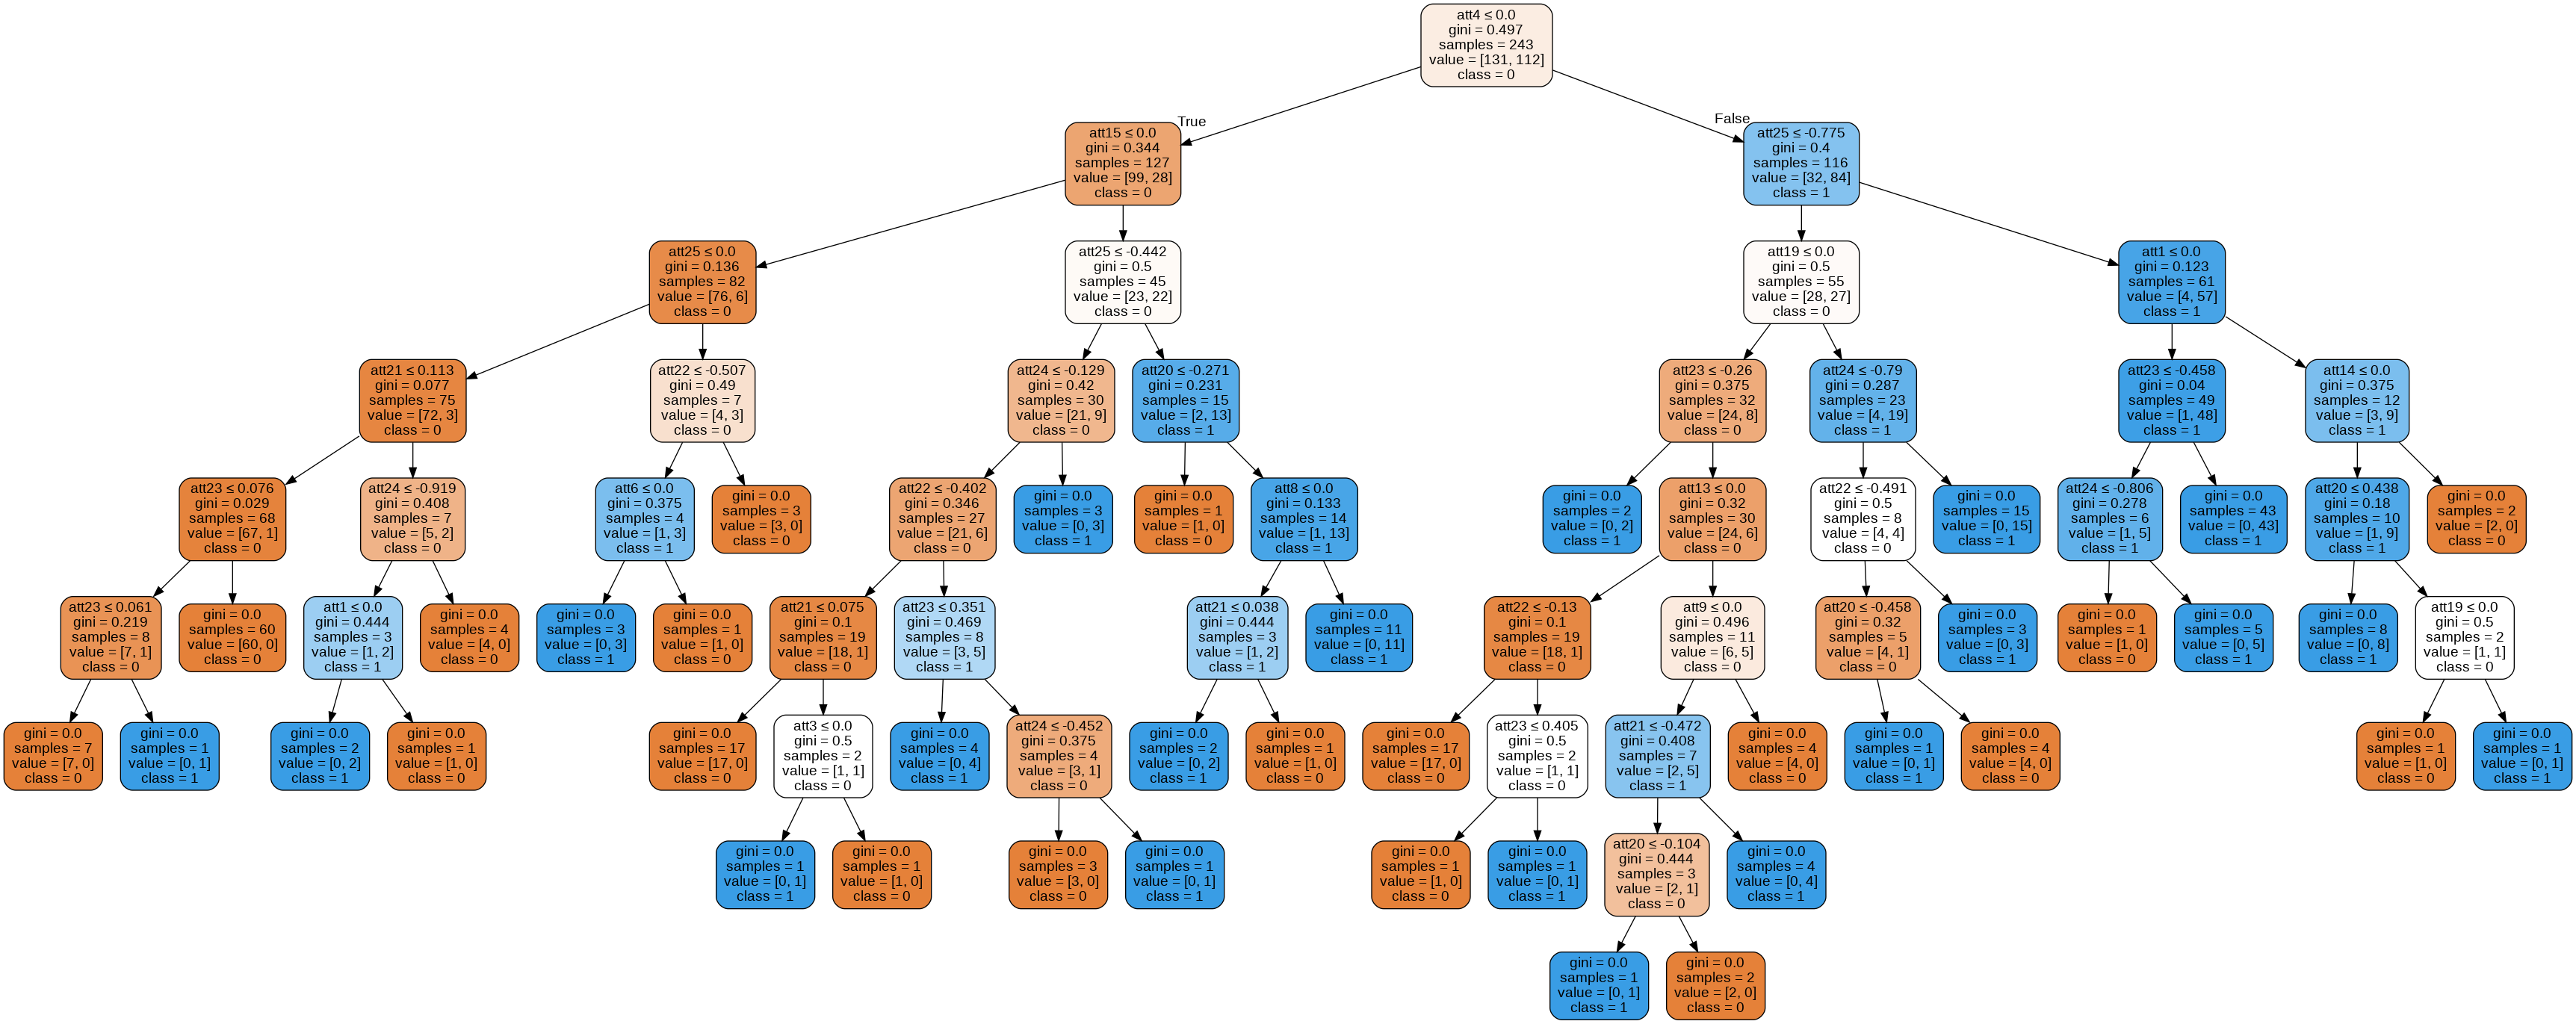

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ["att1",
     "att2",
     "att3",
     "att4",
     "att5",
     "att6",
     "att7",
     "att8",
     "att9",
     "att10",
     "att11",
     "att12",
     "att13",
     "att14",
     "att15",
     "att16",
     "att17",
     "att18",
     "att19",
     "att20",
     "att21",
     "att22",
     "att23",
     "att24",
     "att25"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())